## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [4]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

%matplotlib inline

In [5]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [6]:
X.isnull().any().any()

False

В данных нет пропущенных значений.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['alcohol', 'magnesium']])
X_test_scaled = scaler.fit_transform(X_test[['alcohol', 'magnesium']])

In [10]:
clfs = [] # массив для следующего задания
for k in [1, 3, 5, 10, 15, 25]:
    if k == 1:
        print('NN    Train     Test')
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_scaled, y_train)
    clfs.append(clf)
    y_predicted_train = clf.predict(X_train_scaled)
    accuracy_train = np.mean(y_predicted_train == y_train)
    y_predicted_test = clf.predict(X_test_scaled)
    accuracy_test = np.mean(y_predicted_test == y_test)
    if k == 10 or k == 15 or k == 25:
        space1 = '   '
    else:
        space1 = '    '
    space = '   '
    print(k, space1, round(accuracy_train, 2), space, round(accuracy_test, 2))

NN    Train     Test
1      0.99     0.7
3      0.84     0.74
5      0.81     0.74
10     0.81     0.78
15     0.78     0.78
25     0.73     0.72


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [11]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [12]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

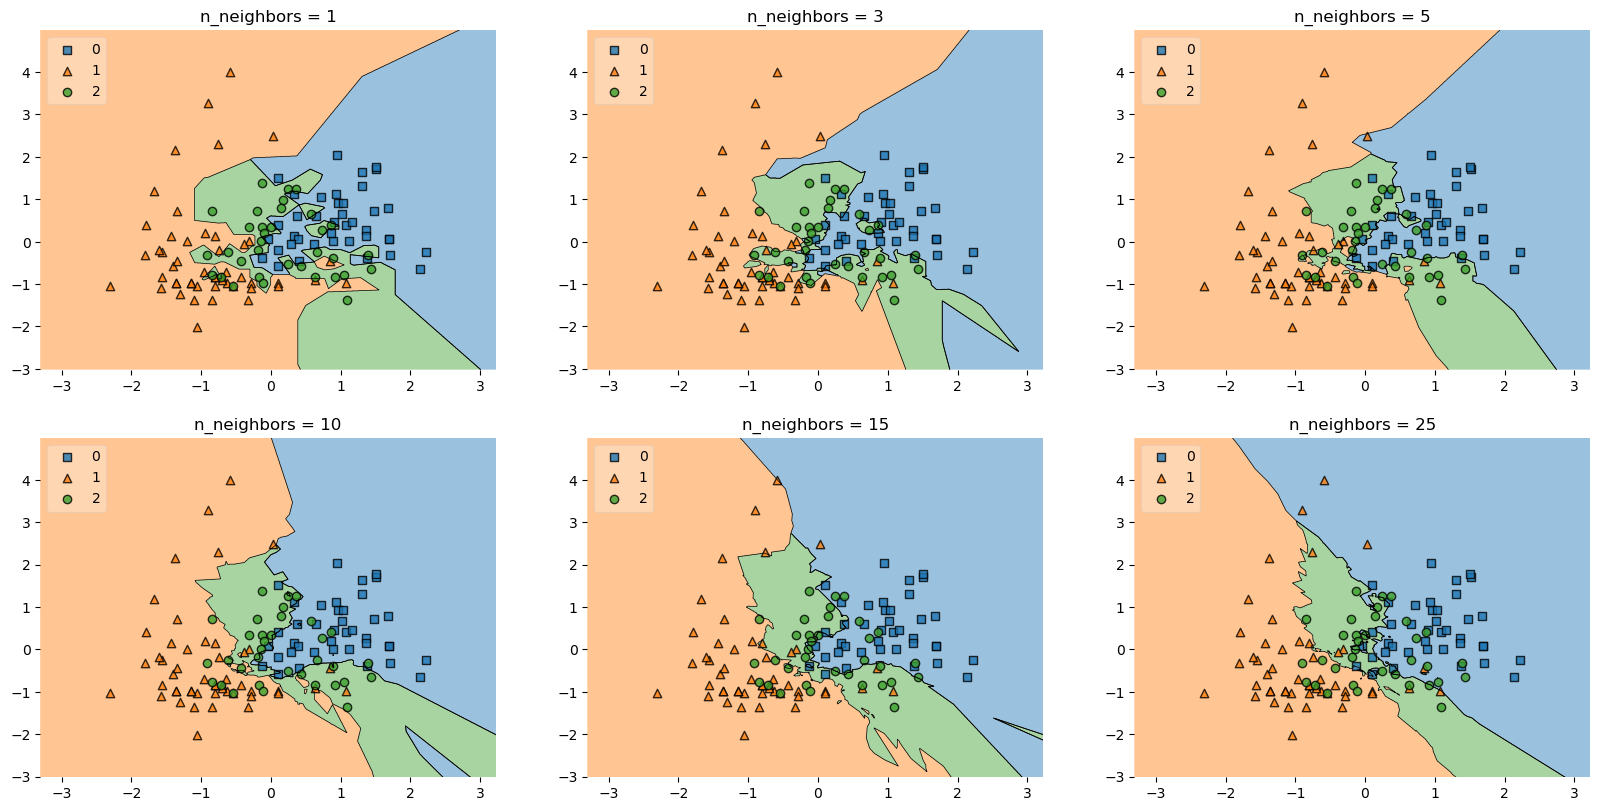

In [13]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(20,15))
labels = ['n_neighbors = 1', 'n_neighbors = 3', 'n_neighbors = 5', 'n_neighbors = 10', 'n_neighbors = 15', 'n_neighbors = 25']

for clf, lab, grd in zip(clfs, 
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()


**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Наибольшую точность на тестовой выборке мы получили при k = 10 и при k = 15. При маленьких k, то есть при k = 1, k = 3, k = 5 мы видим, что модель плохо справляется с генерализацией и начинает подгоняться под выборку (на графиках можно видеть довольно сильно изогнутые границы, разделяющие классы, или куски поверхностей, которые захватывают лишь 1 объект, что явно указывает на то, что модель переобучена, можно сказать, что здесь наблюдается высокий variance и низкий bias). При k = 10 И k = 15 границы становятся плавнее и менее искривленными, но все еще точно описывают данные, не считая едининчых случаев. При k = 20 границы становятся еще более прямыми, что уже ведет к уменьшению точности, так как можно заметить, что на некоторые группы объектов модель вообще не обращает внимания (орнажевые объекты сверху, зеленые объекты справа снизу). Здесь мы наблюдаем низкий variance и высокий bias. Получается, что оптимальные k для решения нашей задачи это k = 10 и k = 15.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

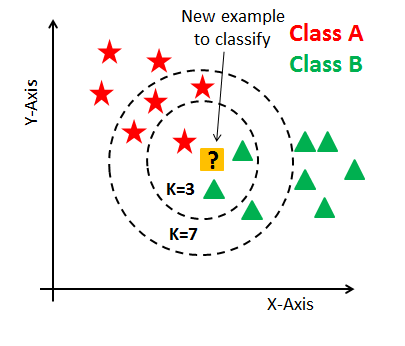

In [14]:
import math
# функция для подсчета Евклидового расстояния 
def calc_dist(data1, data2):
    distance = 0
    for i in range (len(data1)):
        distance += math.pow((data1[i] - data2[i]), 2)
    return math.sqrt(distance)

In [15]:
class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X): 
        predict_final = []
        for i in range(len(X)): # итерируемся по тестовой выборке
            distances = []  
            predictions = [] 
            for j in range(len(self.X_train)): # считаем расстояния от нового объекта из тестовой выборки до каждого объекта из обучающей выборки
                distances.append([self.y_train[j], calc_dist(X[i], self.X_train[j])]) # в массиве храним расстояние и правильный ответ для соответствующего объекта из обучающей выборки
                distances.sort(key=lambda elem: elem[1]) # сортиурем по второму элементу, то есть по расстоянию 
            for m in range(self.k): # заполняем массив первыми k целевыми значениями
                predictions.append(distances[m][0])
            count = {}
            for instance in predictions: # заполняем словарь для вычисления наиболее популярного класса
                if instance in count:
                    count[instance] +=1
                else:
                    count[instance] = 1
            target = max(count.items(), key=lambda x: x[1])[0] # наиболее популярный класс
            predict_final.append(target) # итоговый массив с предсказанием для каждого объекта из тестовой выборки
        return np.array(predict_final)  

In [16]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train) 
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [17]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [18]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [19]:
data.isnull().any().any()

False

Пропущенных значений нет.


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [20]:
data = data.drop(columns = ['Unnamed: 0'])
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [24]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Больше всего с целевой переменной коррелирует признак "carat" (коэффициент корреляяции равен 0.92, то есть при увеличении веса бриллианта в каратах, возрастает его цена). Признаки "x", "y", "z" также достаточно сильно коррелируют с целевой переменной (коэффициенты корреляции равны соответственно 0.884, 0.865, 0.861, то есть то есть при увеличении веса веса бриллианта в каратах, возрастает его цена, но связь не такая сильная, как с признаком "carat").

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [25]:
data = pd.get_dummies(data, columns = ['cut', 'color', 'clarity'])
data

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
data.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['price']), data['price'], test_size=0.3, random_state=42)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [28]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train[['carat', 'depth', 'table', 'x', 'y', 'z']])
X_test_scaled = Scaler.fit_transform(X_test[['carat', 'depth', 'table', 'x', 'y', 'z']])

In [29]:
X_train_final = np.hstack((X_train_scaled, X_train[['cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']]))
X_test_final = np.hstack((X_test_scaled, X_test[['cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']]))

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


In [31]:
def MSE(y: np.array, y_pred: np.array) -> np.float64:
    return np.mean((y_pred - y) ** 2)

In [32]:
lr = LinearRegression()
lr.fit(X_train_final, y_train)
print(f"MSE для тренировочной выборки = {MSE(lr.predict(X_train_final), y_train)} \nMSE для тестовой выборки = {MSE(lr.predict(X_test_final), y_test)}")

MSE для тренировочной выборки = 1290544.8237034986 
MSE для тестовой выборки = 1250221.1375809575


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [33]:
pd.DataFrame(lr.coef_, 
             X_train.columns, 
             columns=['coefs'])\
            .sort_values(by='coefs', ascending=False).style.format("{:.1f}")

,coefs
cut_Ideal,686275120307485.6
cut_Premium,686275120307418.6
cut_Very Good,686275120307383.6
cut_Good,686275120307237.0
cut_Fair,686275120306640.4
color_D,154615246028990.2
color_E,154615246028773.8
color_F,154615246028717.1
color_G,154615246028490.5
color_H,154615246027992.2


У признака "carat" и "x" коэффициент на проядок больше, чем у остальных вещественных признаков по модулю.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [34]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler

In [35]:
lasso = Lasso(10.0).fit(X_train_final, y_train)
print("Lasso")
print(f"Train: {mean_squared_error(y_train, lasso.predict(X_train_final))}")
print(f"Test: {mean_squared_error(y_test, lasso.predict(X_test_final))}")

ridge = Ridge(10.0).fit(X_train_final, y_train)
print("\nRidge")
print(f"Train: {mean_squared_error(y_train, ridge.predict(X_train_final))}")
print(f"Test: {mean_squared_error(y_test, ridge.predict(X_test_final))}")

Lasso
Train: 1327975.7057138293
Test: 1278239.9942142298

Ridge
Train: 1290707.9778318552
Test: 1249840.7537038685


In [36]:
pd.DataFrame(lasso.coef_, 
             X_train.columns, 
             columns=['coefs'])\
            .sort_values(by='coefs', ascending=False).style.format("{:.1f}")

,coefs
carat,4853.4
clarity_IF,725.4
clarity_VVS1,538.3
clarity_VVS2,512.2
color_D,350.4
color_E,176.5
clarity_VS1,160.1
color_F,131.5
cut_Ideal,83.5
color_G,0.0


In [37]:
pd.DataFrame(ridge.coef_, 
             X_train.columns, 
             columns=['coefs'])\
            .sort_values(by='coefs', ascending=False).style.format("{:.1f}")

,coefs
carat,5298.9
clarity_IF,1549.2
clarity_VVS1,1199.6
clarity_VVS2,1127.8
color_D,830.4
clarity_VS1,758.0
color_E,614.6
color_F,558.4
clarity_VS2,438.4
color_G,333.5


В корреляционной матрице прослеживается сильная зависимость между вещественными признаками, что напрямую указывает на проблему мультиколлинеарности в нашем датасете. После использования регуляризации коэффициенты действительно уменьшились. Однако значительное уменьшение весов наблюдается только у категориальных признаков (которые мы к этому моменту уже закодировали), уменьшение весов вещественных признаков совсем небольшое.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

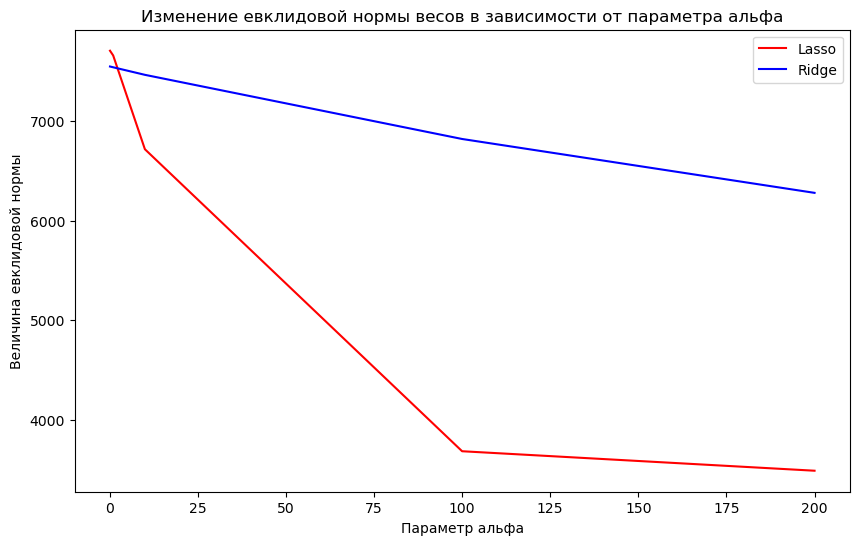

In [39]:
a = [0.1, 1, 10, 100, 200]
lasso_arr = []
ridge_arr = []
for i in a:
    lasso = Lasso(i).fit(X_train_final, y_train)
    lasso_arr.append(np.linalg.norm(lasso.coef_))
    ridge = Ridge(i).fit(X_train_final, y_train)
    ridge_arr.append(np.linalg.norm(ridge.coef_))
plt.figure(figsize=(10,6))
plt.plot(a, lasso_arr, label= 'Lasso', color='r')   
plt.plot(a, ridge_arr, label= 'Ridge', color='b')   
plt.title('Изменение евклидовой нормы весов в зависимости от параметра альфа') 
plt.ylabel('Величина евклидовой нормы')   
plt.xlabel('Параметр альфа') 
plt.legend()
plt.show()


Визуально понятно, что метод с использованием модели Lasso-регрессии намного агрессивнее уменьшает веса, так как при увеличении гиперпараметра альфа, веса резко уменьшаются (красная кривая намного круче). Метод с использованием модели Ridge-регрессии менее агрессивен, так как при увеличении гиперпарметра алфьа, веса уменьшаются плавно (синяя кривая более пологая).


Для отбора признаков часто используют Лассо-регрессию, так как она склонна занулять большие признаки (это наглядно изображено в задании 3.9 при выводе полученных коэффициентов).

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

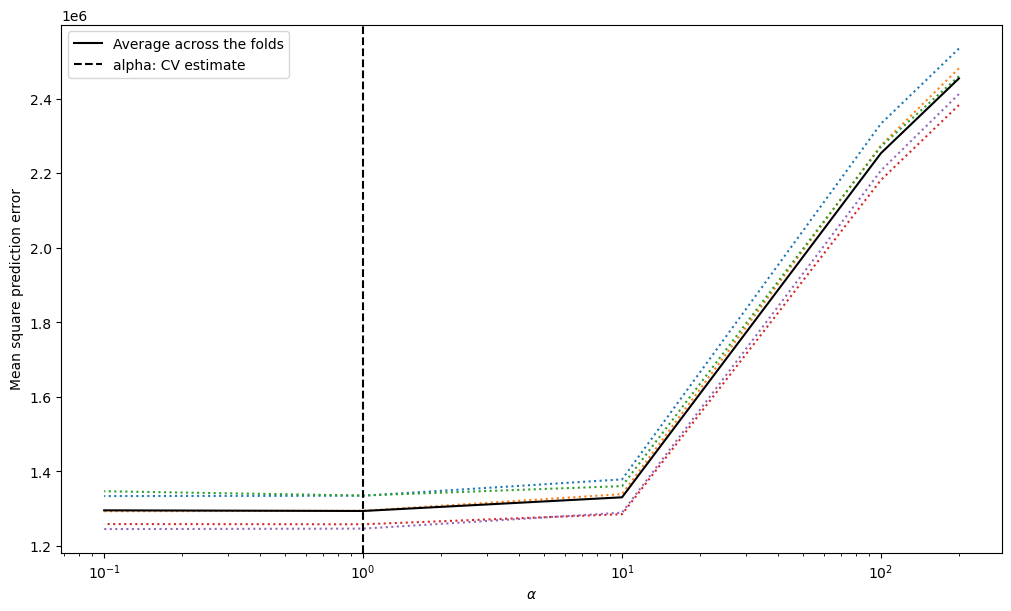

In [40]:
from sklearn.linear_model import LassoCV
a = [0.1, 1, 10, 100, 200]
lasso = LassoCV(alphas=a, cv=5, random_state=42).fit(X_train_final, y_train)

plt.figure(figsize=(10, 6), constrained_layout=True)
plt.semilogx(lasso.alphas_, lasso.mse_path_, ':')
plt.semilogx(lasso.alphas_, lasso.mse_path_.mean(axis=1), 'k', label='Average across the folds')
plt.axvline(lasso.alpha_, linestyle='--', color='k', label='alpha: CV estimate')

plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square prediction error')
plt.show()

Пояснения к графику:
цветными точечными линиями представлена зависимость среднеквадратичной ошибки от гиперпараметра $\alpha$ при разном количестве фолдов в кросс валидации. Черная сплошная линия показывает среднюю ошибку для каждого значения $\alpha$. Черная пунктирная линия демонстрирует значение гиперпараметра $\alpha$, при котором MSE минимальна, то есть оптимальное $\alpha$, подобранное при помощью кросс-валидации по тренировочной выборке ($\alpha$ = 10).

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [41]:
lasso = Lasso(10.0).fit(X_train_final, y_train)
pd.DataFrame(lasso.coef_, 
             X_train.columns, 
             columns=['coefs'])\
            .sort_values(by='coefs', ascending=False).style.format("{:.1f}")

,coefs
carat,4853.4
clarity_IF,725.4
clarity_VVS1,538.3
clarity_VVS2,512.2
color_D,350.4
color_E,176.5
clarity_VS1,160.1
color_F,131.5
cut_Ideal,83.5
color_G,0.0


Признаки, которые в итоге занулились: color_G, y, cut_Very Good, cut_Premium. В описании датасета приводится объяснения признака colour: "diamond colour, from J (worst) to D (best)". Тогда бриллианты могут иметь цвета (от худшему к лучшему) J, I, H, G, F, E, D. Цвет G находится ровно посередине и именно поэтому не несет в себе никакой информации, то есть он определен как "средний" и никак не влияет на целевую переменную. Далее cut_Very Good, cut_Premium - quality of the cut (Fair, Good, Very Good, Premium, Ideal). С этим признаком ситуация аналогична признаку color. Very Good и Premium - серединные значения, поэтому большой информации они не несут и слабо влияют на целевую переменную. Что касается y - width in mm, то нельзя сразу сказать, почему этот признак занулился. Возможно, для этого следует больше углубиться в предметную область. Скорее всего, именно ширина бриллианта не сильно соотносится с его качеством и поэтому не влияет на цену. 

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [42]:
print(f"Test: {mean_squared_error(y_test, lasso.predict(X_test_final))}")

Test: 1278239.9942142298


MSE для обычной линейной регресси на тестовой выборке равна 1250221.1. Это меньше, чем MSE Lasso-регрессии. Значит, лучше использовать модель обычной регрессии. Возможно это произошло из-за того, что мы слишком сильно понизили variance и ушли в сторону высокого bias.